In [4]:
## Import package
from neuralsw.model.shalw import SWmodel
import numpy as np
import xarray as xr
import os
from tqdm import tqdm
import matplotlib.pyplot as plt


In [7]:
## Specify the output
PLOT = True #if plot is wanted

#directory to store the data
datadir = '../../data'

#savefile (to check the run)
outname = os.path.join(datadir,'restartrun.nc')

#restartfile
rstfile = os.path.join(datadir,'restart_10years.nc')

#Duration of the integration
endtime = 48*30*12*10 #10 years

In [8]:
## Init model
SW = SWmodel(nx=80,ny=80)
SW.initstate_cst(0,0,0)

#Save every month
SW.save(time=np.arange(0,endtime,48*30),name=outname)

In [9]:
# run the model
for i in tqdm(range(endtime)):
    SW.next()

100%|██████████| 172800/172800 [04:10<00:00, 690.00it/s]


In [10]:
# Save the restart
SW.save_rst(rstfile)


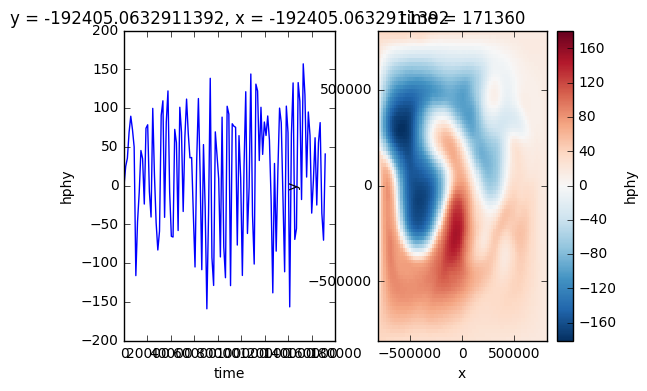

In [13]:
## Plot
if PLOT:
    ds = xr.open_dataset(outname)

    x = 30
    y = 30
    t = -1
    fig, axes = plt.subplots(ncols=2)
    ds.hphy.isel(x=x,y=y).plot(ax=axes[0])
    ds.hphy.isel(time=t).plot(ax=axes[1])
    plt.show()